In [3]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_excel(r"C:\Users\parkh\OneDrive\Desktop\HateSpeech\Data-2.xlsx")
data

,Id,Tweet,Hate,Target,Severity
0,5723,@sudhirchaudhary Abhi tak 2000 ke note me mujh...,0,NaN,NaN
1,2338,@Gulamane_raza @MustakimRazvi Abe katiye tumse...,1,O,H
2,1579,@RajatSharmaLive Ye sab sazish hai....bina sam...,1,O,M
3,6524,abe jao tum to dasko pahle hi fash gye the jab...,1,I,L
4,7618,Ab ye afbah kaun faila Raha hai ki Shahhen bag...,0,NaN,NaN
...,...,...,...,...,...
6391,5227,"@team_hyv Pathaan part 2 bhi aa rha hai, boyco...",1,O,M
6392,5391,@amitku1047 @bordiasanjay @izeenatrana @RahulG...,1,O,L
6393,861,@HusainSahadal Sachaee ladaee hoti h hamare de...,1,O,L
6394,7604,Hahaha hahaha kejurdin ððð,0,NaN,NaN


In [4]:
df = data.copy()
df

,Id,Tweet,Hate,Target,Severity
0,5723,@sudhirchaudhary Abhi tak 2000 ke note me mujh...,0,NaN,NaN
1,2338,@Gulamane_raza @MustakimRazvi Abe katiye tumse...,1,O,H
2,1579,@RajatSharmaLive Ye sab sazish hai....bina sam...,1,O,M
3,6524,abe jao tum to dasko pahle hi fash gye the jab...,1,I,L
4,7618,Ab ye afbah kaun faila Raha hai ki Shahhen bag...,0,NaN,NaN
...,...,...,...,...,...
6391,5227,"@team_hyv Pathaan part 2 bhi aa rha hai, boyco...",1,O,M
6392,5391,@amitku1047 @bordiasanjay @izeenatrana @RahulG...,1,O,L
6393,861,@HusainSahadal Sachaee ladaee hoti h hamare de...,1,O,L
6394,7604,Hahaha hahaha kejurdin ððð,0,NaN,NaN


In [5]:
df.isnull().sum()

Id             0
Tweet          1
Hate           0
Target      2295
Severity    2295
dtype: int64

In [6]:
df['Tweet'] = df['Tweet'].fillna(0)
df['Target'] = df['Target'].fillna(0)
df['Severity'] = df['Severity'].fillna(0)

In [7]:
df.isnull().sum()

Id          0
Tweet       0
Hate        0
Target      0
Severity    0
dtype: int64

In [14]:
df.head()

,Id,Tweet,Hate,Target,Severity,Hateful
0,5723,@sudhirchaudhary Abhi tak 2000 ke note me mujh...,0,0,0,@sudhirchaudhary Abhi tak 2000 ke note me mujh...
1,2338,@Gulamane_raza @MustakimRazvi Abe katiye tumse...,1,O,H,@Gulamane_raza @MustakimRazvi Abe katiye tumse...
2,1579,@RajatSharmaLive Ye sab sazish hai....bina sam...,1,O,M,@RajatSharmaLive Ye sab sazish hai....bina sam...
3,6524,abe jao tum to dasko pahle hi fash gye the jab...,1,I,L,abe jao tum to dasko pahle hi fash gye the jab...
4,7618,Ab ye afbah kaun faila Raha hai ki Shahhen bag...,0,0,0,Ab ye afbah kaun faila Raha hai ki Shahhen bag...


In [8]:
# extract the text and labels
X = list(data['Tweet'])
y = list(data['Hate'])

In [9]:
unique_labels = df['Hate'].unique()
label_dict = {label: i for i, label in enumerate(unique_labels)}
num_labels = len(unique_labels)
print("Label mapping:", label_dict)


Label mapping: {0: 0, 1: 1}


In [10]:
import re
import pandas as pd

def clean_text(text):
    if pd.isnull(text):  # Check for NaN values
        return ''
    
    text = str(text)  # Ensure the input is a string

    # Remove newlines
    text = re.sub(r'\n+', ' ', text)
    
    # Remove URLs (http, https, or www links)
    text = re.sub(r'http\S+|www\S+|t\.co\S+', '', text)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Apply the cleaning function to the 'Tweet' column
df['preprocessed_text'] = df['Tweet'].apply(clean_text)


In [11]:
df['preprocessed_text']

0       @sudhirchaudhary Abhi tak 2000 ke note me mujh...
1       @Gulamane_raza @MustakimRazvi Abe katiye tumse...
2       @RajatSharmaLive Ye sab sazish hai....bina sam...
3       abe jao tum to dasko pahle hi fash gye the jab...
4       Ab ye afbah kaun faila Raha hai ki Shahhen bag...
                              ...                        
6391    @team_hyv Pathaan part 2 bhi aa rha hai, boyco...
6392    @amitku1047 @bordiasanjay @izeenatrana @RahulG...
6393    @HusainSahadal Sachaee ladaee hoti h hamare de...
6394                  Hahaha hahaha kejurdin ððð
6395    Aswini upadhyay aap desh ko grhyudh ke raste p...
Name: preprocessed_text, Length: 6396, dtype: object

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sb
import warnings
from nltk.corpus import stopwords

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import Binarizer


from collections import Counter
from os import listdir, makedirs
from os.path import isfile, join, splitext, split

In [14]:
from wordcloud import STOPWORDS, WordCloud

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.naive_bayes import GaussianNB

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection, naive_bayes, svm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier 

warnings.filterwarnings('ignore')
np.random.seed(0)

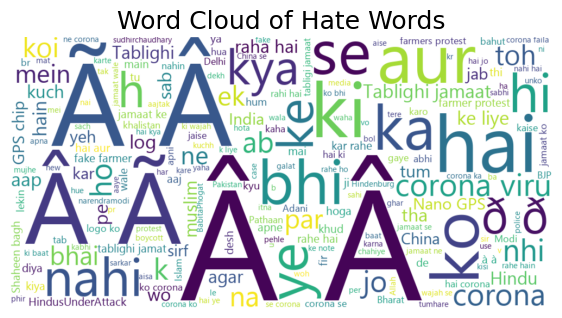

In [29]:
# Define stopwords
english_stopwords = set(stopwords.words('english'))

# Combine all text from the preprocessed column
text = ' '.join(df['preprocessed_text'].astype(str))

# Use Mangal or Nirmala UI, which support Hindi text
font_path = fm.findSystemFonts(fontpaths=None, fontext='ttf')
hindi_font = None
for font in font_path:
    if 'Mangal' in font or 'Nirmala' in font:
        hindi_font = font
        break

# Generate and display the word cloud
if hindi_font:
    wordcloud = WordCloud(
        width=1000, 
        height=500, 
        background_color='white',
        font_path=hindi_font,
        stopwords=english_stopwords
    ).generate(text)

    plt.figure(figsize=(7, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud of Hate Words", fontsize=18)
    plt.show()
else:
    print("No Hindi-compatible font found.")


In [30]:
example=df['Tweet'][3]
example

'abe jao tum to dasko pahle hi fash gye the jab tere dada ne talwar ke nokh par salwar pahena tha tera daram kabhi hindu kabhi muslim Ã°Â\x9fÂ\x98Â\x82Ã°Â\x9fÂ¤Â£Ã°Â\x9fÂ\x98Â\x82Ã°Â\x9fÂ¤Â£'

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 32)

In [17]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

# Fill NaNs with empty strings
X_train = pd.Series(X_train).fillna('')
X_test = pd.Series(X_test).fillna('')

# Vectorize text data
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Support Vector Machine': SVC(),
    'Naive Bayes': MultinomialNB()
}

# Initialize results dictionary
results = {}


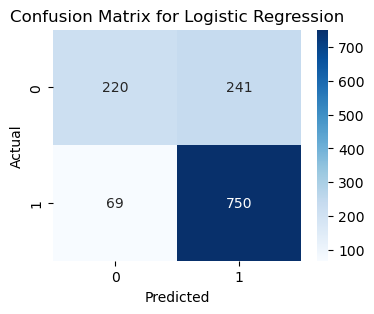

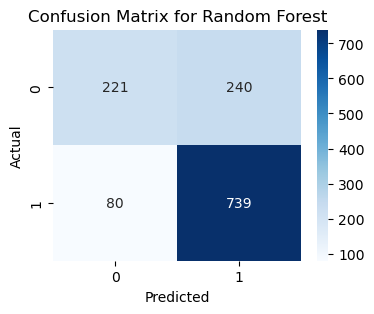

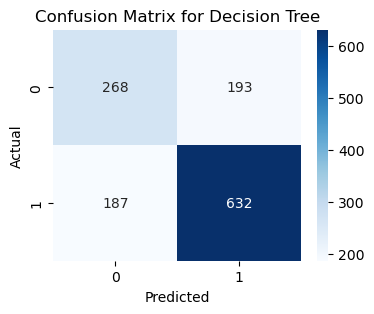

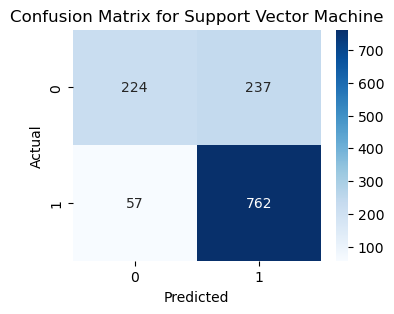

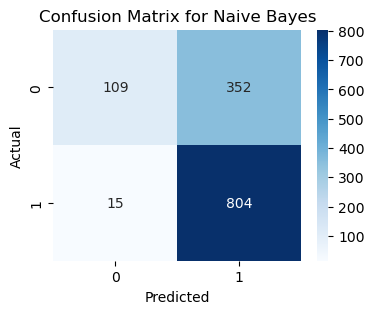

Results for Logistic Regression:
Accuracy: 0.7578125
F1 Score: 0.741548918047882
Precision: 0.7584083688752405
Recall: 0.7578125
Time Taken: 0.09858012199401855


Results for Random Forest:
Accuracy: 0.75
F1 Score: 0.7348767513626981
Precision: 0.7474209224274551
Recall: 0.75
Time Taken: 8.952786922454834


Results for Decision Tree:
Accuracy: 0.703125
F1 Score: 0.7026944446657954
Precision: 0.70229507992008
Recall: 0.703125
Time Taken: 1.0918359756469727


Results for Support Vector Machine:
Accuracy: 0.7703125
F1 Score: 0.7538234985055109
Precision: 0.7751486306146004
Recall: 0.7703125
Time Taken: 4.74121356010437


Results for Naive Bayes:
Accuracy: 0.71328125
F1 Score: 0.6551582751812182
Precision: 0.7616013968146557
Recall: 0.71328125
Time Taken: 0.013857364654541016




In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix
from time import time

# Dictionary to store results
results = {}

# Iterate over each model
for model_name, model in models.items():
    start_time = time()
    
    # Train the model
    model.fit(X_train_tfidf, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test_tfidf)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    time_taken = time() - start_time
    
    # Save results
    results[model_name] = {
        'Accuracy': accuracy,
        'F1 Score': f1,
        'Precision': precision,
        'Recall': recall,
        'Confusion Matrix': conf_matrix,
        'Time Taken': time_taken
    }
    
    # Plot confusion matrix as heatmap
    plt.figure(figsize=(4,3))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Print results
for model_name, metrics in results.items():
    print(f"Results for {model_name}:")
    for metric_name, value in metrics.items():
        if metric_name != 'Confusion Matrix':
            print(f"{metric_name}: {value}")
    print("\n")


In [37]:
for model_name, metrics in results.items():
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"F1 Score: {metrics['F1 Score']:.4f}")
    print(f"Confusion Matrix:\n{metrics['Confusion Matrix']}")
    print(f"Time Taken: {metrics['Time Taken']:.4f} seconds")



Model: Logistic Regression
Accuracy: 0.7578
F1 Score: 0.7415
Confusion Matrix:
[[220 241]
 [ 69 750]]
Time Taken: 0.0986 seconds

Model: Random Forest
Accuracy: 0.7500
F1 Score: 0.7349
Confusion Matrix:
[[221 240]
 [ 80 739]]
Time Taken: 8.9528 seconds

Model: Decision Tree
Accuracy: 0.7031
F1 Score: 0.7027
Confusion Matrix:
[[268 193]
 [187 632]]
Time Taken: 1.0918 seconds

Model: Support Vector Machine
Accuracy: 0.7703
F1 Score: 0.7538
Confusion Matrix:
[[224 237]
 [ 57 762]]
Time Taken: 4.7412 seconds

Model: Naive Bayes
Accuracy: 0.7133
F1 Score: 0.6552
Confusion Matrix:
[[109 352]
 [ 15 804]]
Time Taken: 0.0139 seconds


In [18]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenization
max_words = 10000
max_len = 100

tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Encode the target labels
encoder = LabelEncoder()
df['Hate'] = encoder.fit_transform(df['Hate'])

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    df['preprocessed_text'], df['Hate'], test_size=0.2, random_state=42
)

# Tokenization parameters
max_words = 10000  # Vocabulary size
max_len = 150      # Max sequence length

# Tokenizer
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

# Convert texts to sequences and pad them
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Labels as arrays
y_train = y_train.values
y_test = y_test.values


In [20]:
# Tokenization
max_words = 10000  # Maximum vocabulary size
max_len = 150      # Maximum sequence length

# Initialize the tokenizer
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')

# Fit the tokenizer on training text
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure uniform input size
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

# Ensure all data is in NumPy format
X_train_padded = np.array(X_train_padded)
X_test_padded = np.array(X_test_padded)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Print the shapes for verification
print("X_train shape:", X_train_padded.shape)
print("X_test shape:", X_test_padded.shape)


X_train shape: (5116, 150)
X_test shape: (1280, 150)


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

# CNN Model
cnn_model = Sequential()

# Embedding layer
cnn_model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))

# CNN layers
cnn_model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
cnn_model.add(GlobalMaxPooling1D())

# Fully connected layers
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [22]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform labels to numeric values
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)  # Use transform (not fit_transform) to keep consistency

# Convert to float32 (or int32) for model compatibility
y_train = np.array(y_train).astype('float32')
y_test = np.array(y_test).astype('float32')


In [23]:
# Train the model using the padded sequences
cnn_history = cnn_model.fit(
    X_train_padded, y_train,
    epochs=10, batch_size=32,
    validation_data=(X_test_padded, y_test)
)


Epoch 1/10
160/160 [==============================] - 8s 41ms/step - loss: 0.5730 - accuracy: 0.7019 - val_loss: 0.5163 - val_accuracy: 0.7359
Epoch 2/10
160/160 [==============================] - 8s 49ms/step - loss: 0.3998 - accuracy: 0.8428 - val_loss: 0.5177 - val_accuracy: 0.7547
Epoch 3/10
160/160 [==============================] - 8s 48ms/step - loss: 0.2236 - accuracy: 0.9240 - val_loss: 0.5923 - val_accuracy: 0.7422
Epoch 4/10
160/160 [==============================] - 8s 48ms/step - loss: 0.0850 - accuracy: 0.9775 - val_loss: 0.8300 - val_accuracy: 0.7273
Epoch 5/10
160/160 [==============================] - 7s 41ms/step - loss: 0.0362 - accuracy: 0.9920 - val_loss: 0.9904 - val_accuracy: 0.7305
Epoch 6/10
160/160 [==============================] - 9s 58ms/step - loss: 0.0241 - accuracy: 0.9953 - val_loss: 1.0785 - val_accuracy: 0.7445
Epoch 7/10
160/160 [==============================] - 8s 49ms/step - loss: 0.0181 - accuracy: 0.9967 - val_loss: 1.2025 - val_accuracy: 0.7414

In [45]:
# Evaluate the CNN model
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_padded, y_test)
print(f"CNN Accuracy: {cnn_accuracy * 100:.2f}%")


40/40 [==============================] - 0s 8ms/step - loss: 1.2685 - accuracy: 0.7289
CNN Accuracy: 72.89%


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# LSTM Model
lstm_model = Sequential()

# Embedding layer
lstm_model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))

# LSTM layer
lstm_model.add(LSTM(128, return_sequences=False))

# Fully connected layers
lstm_model.add(Dense(64, activation='relu'))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the LSTM model
lstm_history = lstm_model.fit(
    X_train_padded, y_train,
    epochs=10, batch_size=32,
    validation_data=(X_test_padded, y_test)
)


Epoch 1/10
160/160 [==============================] - 22s 125ms/step - loss: 0.6594 - accuracy: 0.6394 - val_loss: 0.6551 - val_accuracy: 0.6383
Epoch 2/10
160/160 [==============================] - 22s 138ms/step - loss: 0.6567 - accuracy: 0.6419 - val_loss: 0.6555 - val_accuracy: 0.6383
Epoch 3/10
160/160 [==============================] - 20s 122ms/step - loss: 0.6567 - accuracy: 0.6419 - val_loss: 0.6551 - val_accuracy: 0.6383
Epoch 4/10
160/160 [==============================] - 22s 135ms/step - loss: 0.6548 - accuracy: 0.6419 - val_loss: 0.6545 - val_accuracy: 0.6383
Epoch 5/10
160/160 [==============================] - 20s 123ms/step - loss: 0.6548 - accuracy: 0.6419 - val_loss: 0.6548 - val_accuracy: 0.6383
Epoch 6/10
160/160 [==============================] - 20s 125ms/step - loss: 0.6540 - accuracy: 0.6419 - val_loss: 0.6544 - val_accuracy: 0.6383
Epoch 7/10
160/160 [==============================] - 21s 129ms/step - loss: 0.6551 - accuracy: 0.6419 - val_loss: 0.6544 - val_ac

In [48]:
from tensorflow.keras.layers import Bidirectional

# Bi-LSTM Model
bi_lstm_model = Sequential()

# Embedding layer
bi_lstm_model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))

# Bidirectional LSTM layer
bi_lstm_model.add(Bidirectional(LSTM(128, return_sequences=False)))

# Fully connected layers
bi_lstm_model.add(Dense(64, activation='relu'))
bi_lstm_model.add(Dropout(0.5))
bi_lstm_model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
bi_lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the Bi-LSTM model
bi_lstm_history = bi_lstm_model.fit(
    X_train_padded, y_train,
    epochs=10, batch_size=32,
    validation_data=(X_test_padded, y_test)
)


Epoch 1/10
160/160 [==============================] - 38s 218ms/step - loss: 0.5794 - accuracy: 0.6982 - val_loss: 0.5335 - val_accuracy: 0.7328
Epoch 2/10
160/160 [==============================] - 42s 261ms/step - loss: 0.3808 - accuracy: 0.8442 - val_loss: 0.5296 - val_accuracy: 0.7266
Epoch 3/10
160/160 [==============================] - 48s 298ms/step - loss: 0.2421 - accuracy: 0.9142 - val_loss: 0.6624 - val_accuracy: 0.7125
Epoch 4/10
160/160 [==============================] - 51s 321ms/step - loss: 0.1574 - accuracy: 0.9500 - val_loss: 0.7623 - val_accuracy: 0.7102
Epoch 5/10
160/160 [==============================] - 51s 320ms/step - loss: 0.0961 - accuracy: 0.9685 - val_loss: 1.0632 - val_accuracy: 0.7109
Epoch 6/10
160/160 [==============================] - 53s 331ms/step - loss: 0.0580 - accuracy: 0.9826 - val_loss: 1.1037 - val_accuracy: 0.7055
Epoch 7/10
160/160 [==============================] - 52s 324ms/step - loss: 0.0413 - accuracy: 0.9861 - val_loss: 1.5034 - val_ac

In [50]:
# Evaluate the LSTM model
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test_padded, y_test)
print(f"LSTM Accuracy: {lstm_accuracy * 100:.2f}%")


40/40 [==============================] - 1s 29ms/step - loss: 0.6544 - accuracy: 0.6383
LSTM Accuracy: 63.83%


In [49]:
# Evaluate the BI_LSTM model
bi_lstm_loss, bi_lstm_accuracy = bi_lstm_model.evaluate(X_test_padded, y_test)
print(f"BI_LSTM Accuracy: {bi_lstm_accuracy * 100:.2f}%")


40/40 [==============================] - 2s 40ms/step - loss: 1.8917 - accuracy: 0.7063
BI_LSTM Accuracy: 70.63%


In [51]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Conv1D, GlobalMaxPooling1D, Concatenate, Dense, Dropout

# Input
input_layer = Input(shape=(max_len,))

# Shared Embedding layer
embedding = Embedding(input_dim=max_words, output_dim=128, input_length=max_len)(input_layer)

# LSTM Branch
lstm = LSTM(64, return_sequences=True)(embedding)
lstm_pool = GlobalMaxPooling1D()(lstm)

# CNN Branch
conv = Conv1D(64, kernel_size=3, activation='relu')(embedding)
conv_pool = GlobalMaxPooling1D()(conv)

# Merge both
merged = Concatenate()([lstm_pool, conv_pool])
merged = Dropout(0.5)(merged)
output = Dense(1, activation='sigmoid')(merged)

# Final model
model = Model(inputs=input_layer, outputs=output)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150)]                0         []                            
                                                                                                  
 embedding_3 (Embedding)     (None, 150, 128)             1280000   ['input_1[0][0]']             
                                                                                                  
 lstm_2 (LSTM)               (None, 150, 64)              49408     ['embedding_3[0][0]']         
                                                                                                  
 conv1d_1 (Conv1D)           (None, 148, 64)              24640     ['embedding_3[0][0]']         
                                                                                              

In [52]:
history = model.fit(
    X_train_pad, y_train,
    epochs=5,
    batch_size=32,
    validation_data=(X_test_pad, y_test)
)


Epoch 1/5
160/160 [==============================] - 17s 91ms/step - loss: 0.5843 - accuracy: 0.6767 - val_loss: 0.5260 - val_accuracy: 0.7492
Epoch 2/5
160/160 [==============================] - 15s 93ms/step - loss: 0.4484 - accuracy: 0.8184 - val_loss: 0.5073 - val_accuracy: 0.7594
Epoch 3/5
160/160 [==============================] - 19s 117ms/step - loss: 0.3160 - accuracy: 0.8864 - val_loss: 0.5680 - val_accuracy: 0.7273
Epoch 4/5
160/160 [==============================] - 22s 135ms/step - loss: 0.1898 - accuracy: 0.9345 - val_loss: 0.6577 - val_accuracy: 0.7234
Epoch 5/5
160/160 [==============================] - 22s 137ms/step - loss: 0.1015 - accuracy: 0.9705 - val_loss: 0.8520 - val_accuracy: 0.7258


In [55]:
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print(f"Final Training Accuracy: {final_train_acc * 100:.2f}%")
print(f"Final Validation Accuracy: {final_val_acc * 100:.2f}%")

Final Training Accuracy: 97.05%
Final Validation Accuracy: 72.58%


In [26]:
df

,Id,Tweet,Hate,Target,Severity,preprocessed_text
0,5723,@sudhirchaudhary Abhi tak 2000 ke note me mujh...,0,0,0,@sudhirchaudhary Abhi tak 2000 ke note me mujh...
1,2338,@Gulamane_raza @MustakimRazvi Abe katiye tumse...,1,O,H,@Gulamane_raza @MustakimRazvi Abe katiye tumse...
2,1579,@RajatSharmaLive Ye sab sazish hai....bina sam...,1,O,M,@RajatSharmaLive Ye sab sazish hai....bina sam...
3,6524,abe jao tum to dasko pahle hi fash gye the jab...,1,I,L,abe jao tum to dasko pahle hi fash gye the jab...
4,7618,Ab ye afbah kaun faila Raha hai ki Shahhen bag...,0,0,0,Ab ye afbah kaun faila Raha hai ki Shahhen bag...
...,...,...,...,...,...,...
6391,5227,"@team_hyv Pathaan part 2 bhi aa rha hai, boyco...",1,O,M,"@team_hyv Pathaan part 2 bhi aa rha hai, boyco..."
6392,5391,@amitku1047 @bordiasanjay @izeenatrana @RahulG...,1,O,L,@amitku1047 @bordiasanjay @izeenatrana @RahulG...
6393,861,@HusainSahadal Sachaee ladaee hoti h hamare de...,1,O,L,@HusainSahadal Sachaee ladaee hoti h hamare de...
6394,7604,Hahaha hahaha kejurdin ððð,0,0,0,Hahaha hahaha kejurdin ððð


In [30]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Conv1D, GlobalMaxPooling1D, concatenate, Dense, Dropout
from tensorflow.keras.utils import to_categorical

num_classes = len(df['Hate'].unique())
texts = df['Hate'].astype(str).values
labels = to_categorical(df['Hate'].astype(int).values, num_classes=num_classes)

# 2. Split data
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# 3. Tokenization & Padding
max_words = 10000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# 4. Build Hybrid Model: CNN + LSTM
input_layer = Input(shape=(max_len,))
embedding_layer = Embedding(input_dim=max_words, output_dim=128, input_length=max_len)(input_layer)

# CNN branch
cnn_layer = Conv1D(64, 5, activation='relu')(embedding_layer)
cnn_layer = GlobalMaxPooling1D()(cnn_layer)

# LSTM branch
lstm_layer = LSTM(64)(embedding_layer)

# Merge both branches
merged = concatenate([cnn_layer, lstm_layer])
dense = Dense(64, activation='relu')(merged)
dropout = Dropout(0.5)(dense)
output = Dense(num_classes, activation='softmax')(dropout)

# Compile model
model = Model(inputs=input_layer, outputs=output)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 5. Train model
history = model.fit(
    X_train_pad, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test_pad, y_test)
)

Epoch 1/10
160/160 [==============================] - 12s 58ms/step - loss: 0.1330 - accuracy: 0.9400 - val_loss: 8.6550e-05 - val_accuracy: 1.0000
Epoch 2/10
160/160 [==============================] - 10s 59ms/step - loss: 7.4428e-04 - accuracy: 0.9998 - val_loss: 1.0874e-05 - val_accuracy: 1.0000
Epoch 3/10
160/160 [==============================] - 8s 50ms/step - loss: 2.5924e-04 - accuracy: 1.0000 - val_loss: 2.4527e-06 - val_accuracy: 1.0000
Epoch 4/10
160/160 [==============================] - 8s 49ms/step - loss: 1.8030e-04 - accuracy: 1.0000 - val_loss: 8.9789e-07 - val_accuracy: 1.0000
Epoch 5/10
160/160 [==============================] - 8s 51ms/step - loss: 8.7347e-05 - accuracy: 1.0000 - val_loss: 3.6778e-07 - val_accuracy: 1.0000
Epoch 6/10
160/160 [==============================] - 10s 64ms/step - loss: 5.6189e-05 - accuracy: 1.0000 - val_loss: 1.6233e-07 - val_accuracy: 1.0000
Epoch 7/10
160/160 [==============================] - 10s 62ms/step - loss: 3.9946e-05 - accura

In [31]:
loss, accuracy = model.evaluate(X_test_pad, y_test, verbose=1)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


40/40 [==============================] - 1s 14ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Test Accuracy: 100.00%
